In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats as stats

In [2]:
#read in files
file_path = "Merge Data Folders/official.csv"

# Read the census data 
df1 = pd.read_csv(file_path)
df1.head()

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,99556.0,2015.0,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,99503.0,2015.0,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,99744.0,2015.0,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,99559.0,2015.0,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,99652.0,2015.0,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282


In [3]:
df1.columns

Index(['State', 'Library ID', 'Submission Year', 'Library Name',
       'Street Address', 'City', 'Zip Code', 'Longitude', 'Latitude',
       'State Code', 'County Code', 'County', 'County Population',
       'Print_Collection_Expenditures', 'Digital_Collection_Expenditures',
       'Total Collection Expenditures', 'Total Operating Expenditures',
       'Print Collection', 'Digital Collection', 'Audio Collection',
       'Library Visits', 'Registered Users', 'Name', 'median_household_income',
       'total_population', 'median_age', 'per_capita', 'education_none',
       'education_high_school', 'education_ged', 'education_associates',
       'education_bachelors', 'education_masters', 'education_professional',
       'education_doctorate', 'state', 'zipcode', 'year',
       'education_none_perc', 'education_high_school_perc',
       'education_ged_perc', 'education_associates_perc',
       'education_bachelors_perc', 'education_masters_perc',
       'education_professional_perc', 'edu

In [4]:
#add registered users columns

df1["reg_users_perc"] = df1["Registered Users"] / df1["total_population"]
df1.head()

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,2015.0,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616,0.009200
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,2015.0,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125,2.554924
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,2015.0,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000,0.001836
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,2015.0,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026,0.020724
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,2015.0,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282,0.056480


# Reported Education Data Analysis

In [5]:
#add education percentage columns

df1["total_edu"] = df1['education_none_perc'] +  df1['education_high_school_perc'] + df1['education_ged_perc'] + df1['education_associates_perc']+df1['education_bachelors_perc'] + df1['education_masters_perc'] +df1['education_professional_perc'] + df1['education_doctorate_perc']
df1.head()      
        

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616,0.009200,2.564877
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125,2.554924,12.324056
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000,0.001836,0.096912
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026,0.020724,3.922300
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282,0.056480,2.266206


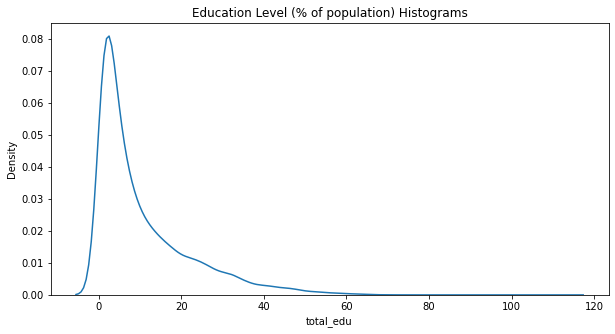

In [6]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df1, x="total_edu")
plt.title("Education Level (% of population) Histograms")
plt.show()

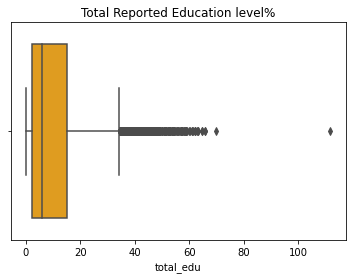

In [7]:
ax = sns.boxplot(x="total_edu", data=df1, color="#FFA600")

plt.title("Total Reported Education level%")

plt.show()

In [8]:
#find outlier in reported data
mask= df1.total_edu >=100
df1.loc[mask]


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
968,FL,FL0023,2015,HIALEAH PUBLIC LIBRARIES,190 WEST 49 STREET,HIALEAH,33012,-80.286731,25.866715,12,...,5.363997,60.500293,5.458331,13.71739,18.297443,4.947629,2.64459,0.878277,1.777698,111.80795


In [9]:
# drop outlier in reported data
mask= df1.total_edu <=100
df= df1.loc[mask]
df.head()

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616,0.009200,2.564877
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125,2.554924,12.324056
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000,0.001836,0.096912
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026,0.020724,3.922300
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282,0.056480,2.266206


In [10]:
palette = ["#003F5C", "#58508D", "#BC5090", "#FF6361", "#FFA600", "#EC6B56", "#FFC154", "#47B39C"]

percentages= ['education_none_perc', 'education_high_school_perc',
       'education_ged_perc', 'education_associates_perc',
       'education_bachelors_perc', 'education_masters_perc',
       'education_professional_perc', 'education_doctorate_perc']

# heatmap

# Bar Chart

# KDE Analysis

In [13]:
lower_bounds = []
upper_bounds = []
range_edu =[]

for perc in percentages:

    quartiles = df[perc].quantile([.25, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound= lowerq - (1.5*iqr)
    upper_bound= upperq + (1.5*iqr)
    
    range_edu.append(iqr)
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

    #identify any outliers
    
    mask = (df[perc]> upper_bound) | (df[perc]< lower_bound)
    outlier = df.loc[mask]
    
    #https://datatofish.com/pandas-dataframe-empty/
    #https://www.geeksforgeeks.org/how-to-print-an-entire-pandas-dataframe-in-python/
    if outlier.empty==False:
        print(perc)
        display(outlier)
    else:
        print(f"No outliers for {perc}.")
        



education_none_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
82,AL,AL0006,2015,HALEYVILLE PUBLIC LIBRARY,913 20TH STREET,HALEYVILLE,35565,-87.623363,34.226400,1,...,0.764484,8.501885,1.474117,2.704834,2.019198,0.843332,0.054851,0.034282,0.128385,16.396983
86,AL,AL0011,2015,ROANOKE - ANNIE L. AWBREY PUBLIC LIBRARY,736 COLLEGE STREET,ROANOKE,36274,-85.370689,33.149541,1,...,0.612385,5.805300,1.573527,2.078814,2.232596,0.859536,0.060415,0.038446,0.202746,13.261019
88,AL,AL0013,2015,SYLACAUGA - B. B. COMER MEMORIAL LIBRARY,314 NORTH BROADWAY AVENUE,SYLACAUGA,35150,-86.250731,33.171811,1,...,0.610866,12.480504,2.472706,2.839875,3.499480,1.312711,0.233949,0.045490,0.990707,23.495581
95,AL,AL0020,2015,TALLADEGA - ARMSTRONG-OSBORNE PUBLIC LIBRARY,202 SOUTH STREET EAST,TALLADEGA,35160,-86.099763,33.433119,1,...,0.824637,15.569150,4.827876,3.244572,4.249130,2.135061,0.698693,0.323858,0.555206,31.872976
107,AL,AL0035,2015,UNION SPRINGS PUBLIC LIBRARY,103 NORTH PRAIRIE STREET,UNION SPRINGS,36089,-85.716112,32.140621,1,...,0.931646,4.578942,1.037365,0.505468,0.948165,0.792890,0.412964,0.102415,0.072219,9.309855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,WI,WI0268,2015,RACINE PUBLIC LIBRARY,75 SEVENTH ST.,RACINE,53403,-87.781414,42.726007,55,...,0.788982,8.685808,2.492997,3.265640,4.976657,2.021475,0.408497,0.298786,1.413025,22.938842
8931,WI,WI0292,2015,MEAD PUBLIC LIBRARY,710 N. 8TH ST.,SHEBOYGAN,53081,-87.712943,43.752360,55,...,1.319693,22.616962,3.872656,6.040221,8.616542,2.947703,0.422769,0.238245,0.953449,46.074790
8980,WI,WI0344,2015,WEST ALLIS PUBLIC LIBRARY,7421 W. NATIONAL AVE.,WEST ALLIS,53214,-88.005487,43.012080,55,...,0.682862,16.643270,2.843275,5.553308,10.000238,2.117585,0.287896,0.235552,0.951200,38.363987
9051,WV,WV0001,2015,RALEIGH COUNTY PUBLIC LIBRARY,221 N. KANAWHA ST.,BECKLEY,25801,-81.187807,37.779801,54,...,0.590903,18.686018,4.027472,4.289232,9.135674,3.457302,0.785279,0.347285,1.107607,41.319165


education_high_school_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
95,AL,AL0020,2015,TALLADEGA - ARMSTRONG-OSBORNE PUBLIC LIBRARY,202 SOUTH STREET EAST,TALLADEGA,35160,-86.099763,33.433119,1,...,0.824637,15.569150,4.827876,3.244572,4.249130,2.135061,0.698693,0.323858,0.555206,31.872976
129,AL,AL0059,2015,FLORENCE - LAUDERDALE PUBLIC LIBRARY,350 NORTH WOOD AVENUE,FLORENCE,35630,-87.674653,34.803563,1,...,1.018161,16.686349,3.338546,3.064058,9.747534,4.532252,1.056462,0.721330,1.382497,40.164693
146,AL,AL0077,2015,DECATUR PUBLIC LIBRARY,504 CHERRY STREET NE,DECATUR,35601,-86.981431,34.606014,1,...,1.235413,14.118227,4.095217,4.382841,8.069906,3.158385,0.766997,0.186271,0.953925,36.013258
159,AL,AL0091,2015,BESSEMER PUBLIC LIBRARY,400 19TH STREET N,BESSEMER,35020,-86.954919,33.403367,1,...,0.754732,21.839310,3.661848,5.758326,4.081144,1.529431,0.567047,0.119799,0.728296,38.311636
216,AL,AL0154,2015,ANNISTON - CALHOUN COUNTY PUBLIC LIBRARY,108 EAST 10TH STREET,ANNISTON,36201,-85.828232,33.657102,1,...,1.721113,14.733896,3.471468,2.677751,2.126326,1.056897,0.121146,0.108614,1.055769,26.017211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9053,WV,WV0003,2015,PRINCETON PUBLIC LIBRARY,920 MERCER STREET,PRINCETON,24740,-81.095438,37.369408,54,...,0.572202,16.920837,4.122921,3.885355,7.448847,2.419087,1.203157,0.352517,0.693489,36.924924
9088,WV,WV0040,2015,CLARKSBURG-HARRISON CO. PUBLIC LIBRARY,404 W. PIKE STREET,CLARKSBURG,26301,-80.340653,39.280822,54,...,0.450511,19.650854,3.832024,4.086777,6.690622,2.215012,0.517551,0.268161,0.500442,37.711512
9092,WV,WV0044,2015,NUTTER FORT PUBLIC LIBRARY,1300 BUCKHANNON PIKE,NUTTER FORT,26301,-80.318850,39.254668,54,...,0.450511,19.650854,3.832024,4.086777,6.690622,2.215012,0.517551,0.268161,0.030758,37.711512
9107,WV,WV0060,2015,OHIO COUNTY PUBLIC LIBRARY,52 16TH ST.,WHEELING,26003,-80.698702,40.117348,54,...,0.494894,22.666152,2.515511,5.265191,14.110518,5.482461,1.861285,0.743548,0.729064,53.139560


education_ged_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
50,AK,AK0078,2015,WASILLA PUBLIC LIBRARY,391 NORTH MAIN STREET,WASILLA,99654,-149.441482,61.583125,2,...,0.181442,12.542192,2.864385,4.486692,5.923554,2.049230,0.396238,0.229471,0.136242,28.673204
88,AL,AL0013,2015,SYLACAUGA - B. B. COMER MEMORIAL LIBRARY,314 NORTH BROADWAY AVENUE,SYLACAUGA,35150,-86.250731,33.171811,1,...,0.610866,12.480504,2.472706,2.839875,3.499480,1.312711,0.233949,0.045490,0.990707,23.495581
95,AL,AL0020,2015,TALLADEGA - ARMSTRONG-OSBORNE PUBLIC LIBRARY,202 SOUTH STREET EAST,TALLADEGA,35160,-86.099763,33.433119,1,...,0.824637,15.569150,4.827876,3.244572,4.249130,2.135061,0.698693,0.323858,0.555206,31.872976
112,AL,AL0041,2015,ENTERPRISE PUBLIC LIBRARY,101 EAST GRUBBS STREET,ENTERPRISE,36330,-85.852791,31.314037,1,...,0.586175,9.752995,2.376037,4.575115,8.060829,3.467281,0.753917,0.350230,0.412055,29.922581
120,AL,AL0049,2015,ALEXANDER CITY - ADELIA MCCONNELL RUSSELL LIBRARY,318 CHURCH STREET,ALEXANDER CITY,35010,-85.953922,32.941472,1,...,0.746423,11.294097,2.337016,3.412221,4.795474,1.401025,0.453186,0.225112,0.296703,24.664554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9107,WV,WV0060,2015,OHIO COUNTY PUBLIC LIBRARY,52 16TH ST.,WHEELING,26003,-80.698702,40.117348,54,...,0.494894,22.666152,2.515511,5.265191,14.110518,5.482461,1.861285,0.743548,0.729064,53.139560
9115,WV,WV0068,2015,MARY H. WEIR PUBLIC LIBRARY,3442 MAIN STREET,WEIRTON,26062,-80.589901,40.400559,54,...,0.398660,12.898965,2.382175,3.558588,5.720645,1.751168,0.545406,0.149192,0.334948,27.404799
9122,WV,WV0075,2015,MARION COUNTY PUBLIC LIBRARY,321 MONROE ST.,FAIRMONT,26554,-80.144264,39.484890,54,...,0.320600,20.683193,3.318884,5.138625,11.029080,4.027815,0.792468,0.598302,0.498149,45.908968
9125,WV,WV0078,2015,FAYETTE COUNTY PUBLIC LIBRARY,531 SUMMIT STREET,OAK HILL,25901,-81.152984,37.972081,54,...,0.439639,6.702428,2.789913,1.249793,2.195432,0.884809,0.094011,0.022120,0.590140,14.378145


education_associates_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
50,AK,AK0078,2015,WASILLA PUBLIC LIBRARY,391 NORTH MAIN STREET,WASILLA,99654,-149.441482,61.583125,2,...,0.181442,12.542192,2.864385,4.486692,5.923554,2.049230,0.396238,0.229471,0.136242,28.673204
112,AL,AL0041,2015,ENTERPRISE PUBLIC LIBRARY,101 EAST GRUBBS STREET,ENTERPRISE,36330,-85.852791,31.314037,1,...,0.586175,9.752995,2.376037,4.575115,8.060829,3.467281,0.753917,0.350230,0.412055,29.922581
146,AL,AL0077,2015,DECATUR PUBLIC LIBRARY,504 CHERRY STREET NE,DECATUR,35601,-86.981431,34.606014,1,...,1.235413,14.118227,4.095217,4.382841,8.069906,3.158385,0.766997,0.186271,0.953925,36.013258
152,AL,AL0083,2015,FOLEY PUBLIC LIBRARY,319 EAST LAUREL AVENUE,FOLEY,36535,-87.679586,30.406366,1,...,0.369995,12.766008,2.891617,4.854712,6.247496,2.370796,0.862536,0.214456,0.563877,30.577616
159,AL,AL0091,2015,BESSEMER PUBLIC LIBRARY,400 19TH STREET N,BESSEMER,35020,-86.954919,33.403367,1,...,0.754732,21.839310,3.661848,5.758326,4.081144,1.529431,0.567047,0.119799,0.728296,38.311636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,WI,WI0360,2015,MCMILLAN MEMORIAL LIBRARY,490 E. GRAND AVE.,WISCONSIN RAPIDS,54494,-89.821407,44.388313,55,...,0.141858,12.809949,1.700350,5.196269,4.869802,1.575981,0.373105,0.237077,0.417586,26.904392
9051,WV,WV0001,2015,RALEIGH COUNTY PUBLIC LIBRARY,221 N. KANAWHA ST.,BECKLEY,25801,-81.187807,37.779801,54,...,0.590903,18.686018,4.027472,4.289232,9.135674,3.457302,0.785279,0.347285,1.107607,41.319165
9107,WV,WV0060,2015,OHIO COUNTY PUBLIC LIBRARY,52 16TH ST.,WHEELING,26003,-80.698702,40.117348,54,...,0.494894,22.666152,2.515511,5.265191,14.110518,5.482461,1.861285,0.743548,0.729064,53.139560
9122,WV,WV0075,2015,MARION COUNTY PUBLIC LIBRARY,321 MONROE ST.,FAIRMONT,26554,-80.144264,39.484890,54,...,0.320600,20.683193,3.318884,5.138625,11.029080,4.027815,0.792468,0.598302,0.498149,45.908968


education_bachelors_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
112,AL,AL0041,2015,ENTERPRISE PUBLIC LIBRARY,101 EAST GRUBBS STREET,ENTERPRISE,36330,-85.852791,31.314037,1,...,0.586175,9.752995,2.376037,4.575115,8.060829,3.467281,0.753917,0.350230,0.412055,29.922581
123,AL,AL0052,2015,AUBURN PUBLIC LIBRARY,749 EAST THACH AVENUE,AUBURN,36830,-85.466363,32.604411,1,...,0.168117,4.533281,0.815170,2.195289,13.300753,6.802854,1.624475,3.426840,0.574841,32.866777
129,AL,AL0059,2015,FLORENCE - LAUDERDALE PUBLIC LIBRARY,350 NORTH WOOD AVENUE,FLORENCE,35630,-87.674653,34.803563,1,...,1.018161,16.686349,3.338546,3.064058,9.747534,4.532252,1.056462,0.721330,1.382497,40.164693
146,AL,AL0077,2015,DECATUR PUBLIC LIBRARY,504 CHERRY STREET NE,DECATUR,35601,-86.981431,34.606014,1,...,1.235413,14.118227,4.095217,4.382841,8.069906,3.158385,0.766997,0.186271,0.953925,36.013258
150,AL,AL0081,2015,DAPHNE PUBLIC LIBRARY,2607 U.S. HIGHWAY 98,DAPHNE,36526,-87.905194,30.618100,1,...,0.173743,5.986227,0.841863,2.813053,9.709060,2.563495,0.822909,0.499115,0.365191,23.409464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051,WV,WV0001,2015,RALEIGH COUNTY PUBLIC LIBRARY,221 N. KANAWHA ST.,BECKLEY,25801,-81.187807,37.779801,54,...,0.590903,18.686018,4.027472,4.289232,9.135674,3.457302,0.785279,0.347285,1.107607,41.319165
9054,WV,WV0004,2015,CABELL COUNTY PUBLIC LIBRARY,455 9TH STREET,HUNTINGTON,25701,-82.443666,38.419830,54,...,0.291157,9.244932,2.099104,3.546571,8.083077,5.407204,1.855087,1.117489,2.643651,31.644622
9071,WV,WV0023,2015,MORGANTOWN PUBLIC LIBRARY,373 SPRUCE STREET,MORGANTOWN,26505,-79.954327,39.630114,54,...,0.313643,10.213016,2.407867,2.986147,15.218244,8.073053,3.250784,3.535024,0.833834,45.997778
9107,WV,WV0060,2015,OHIO COUNTY PUBLIC LIBRARY,52 16TH ST.,WHEELING,26003,-80.698702,40.117348,54,...,0.494894,22.666152,2.515511,5.265191,14.110518,5.482461,1.861285,0.743548,0.729064,53.139560


education_masters_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
123,AL,AL0052,2015,AUBURN PUBLIC LIBRARY,749 EAST THACH AVENUE,AUBURN,36830,-85.466363,32.604411,1,...,0.168117,4.533281,0.815170,2.195289,13.300753,6.802854,1.624475,3.426840,0.574841,32.866777
129,AL,AL0059,2015,FLORENCE - LAUDERDALE PUBLIC LIBRARY,350 NORTH WOOD AVENUE,FLORENCE,35630,-87.674653,34.803563,1,...,1.018161,16.686349,3.338546,3.064058,9.747534,4.532252,1.056462,0.721330,1.382497,40.164693
151,AL,AL0082,2015,FAIRHOPE PUBLIC LIBRARY,501 FAIRHOPE AVENUE,FAIRHOPE,36532,-87.900890,30.523053,1,...,0.164533,6.525387,1.105663,3.017539,9.478759,4.254829,1.385370,0.705848,0.330761,26.637928
165,AL,AL0097,2015,HOMEWOOD PUBLIC LIBRARY,1721 OXMOOR ROAD,HOMEWOOD,35209,-86.795527,33.475485,1,...,0.225175,4.407005,0.993184,1.827540,10.736042,3.980780,2.923259,1.523955,0.470958,26.616940
166,AL,AL0098,2015,HOOVER PUBLIC LIBRARY,200 MUNICIPAL DRIVE,HOOVER,35216,-86.805959,33.387877,1,...,0.134139,5.756660,0.632911,2.924617,14.249008,5.435481,2.108445,1.579445,1.140091,32.820707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9045,WI,WI0424,2015,FITCHBURG PUBLIC LIBRARY,5530 LACY RD.,FITCHBURG,53711,-89.425400,43.001241,55,...,0.374754,5.089587,0.994159,3.289353,13.795200,7.527612,2.686918,2.695403,0.231131,36.452986
9054,WV,WV0004,2015,CABELL COUNTY PUBLIC LIBRARY,455 9TH STREET,HUNTINGTON,25701,-82.443666,38.419830,54,...,0.291157,9.244932,2.099104,3.546571,8.083077,5.407204,1.855087,1.117489,2.643651,31.644622
9071,WV,WV0023,2015,MORGANTOWN PUBLIC LIBRARY,373 SPRUCE STREET,MORGANTOWN,26505,-79.954327,39.630114,54,...,0.313643,10.213016,2.407867,2.986147,15.218244,8.073053,3.250784,3.535024,0.833834,45.997778
9107,WV,WV0060,2015,OHIO COUNTY PUBLIC LIBRARY,52 16TH ST.,WHEELING,26003,-80.698702,40.117348,54,...,0.494894,22.666152,2.515511,5.265191,14.110518,5.482461,1.861285,0.743548,0.729064,53.139560


education_professional_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
112,AL,AL0041,2015,ENTERPRISE PUBLIC LIBRARY,101 EAST GRUBBS STREET,ENTERPRISE,36330,-85.852791,31.314037,1,...,0.586175,9.752995,2.376037,4.575115,8.060829,3.467281,0.753917,0.350230,0.412055,29.922581
123,AL,AL0052,2015,AUBURN PUBLIC LIBRARY,749 EAST THACH AVENUE,AUBURN,36830,-85.466363,32.604411,1,...,0.168117,4.533281,0.815170,2.195289,13.300753,6.802854,1.624475,3.426840,0.574841,32.866777
129,AL,AL0059,2015,FLORENCE - LAUDERDALE PUBLIC LIBRARY,350 NORTH WOOD AVENUE,FLORENCE,35630,-87.674653,34.803563,1,...,1.018161,16.686349,3.338546,3.064058,9.747534,4.532252,1.056462,0.721330,1.382497,40.164693
146,AL,AL0077,2015,DECATUR PUBLIC LIBRARY,504 CHERRY STREET NE,DECATUR,35601,-86.981431,34.606014,1,...,1.235413,14.118227,4.095217,4.382841,8.069906,3.158385,0.766997,0.186271,0.953925,36.013258
150,AL,AL0081,2015,DAPHNE PUBLIC LIBRARY,2607 U.S. HIGHWAY 98,DAPHNE,36526,-87.905194,30.618100,1,...,0.173743,5.986227,0.841863,2.813053,9.709060,2.563495,0.822909,0.499115,0.365191,23.409464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9054,WV,WV0004,2015,CABELL COUNTY PUBLIC LIBRARY,455 9TH STREET,HUNTINGTON,25701,-82.443666,38.419830,54,...,0.291157,9.244932,2.099104,3.546571,8.083077,5.407204,1.855087,1.117489,2.643651,31.644622
9071,WV,WV0023,2015,MORGANTOWN PUBLIC LIBRARY,373 SPRUCE STREET,MORGANTOWN,26505,-79.954327,39.630114,54,...,0.313643,10.213016,2.407867,2.986147,15.218244,8.073053,3.250784,3.535024,0.833834,45.997778
9107,WV,WV0060,2015,OHIO COUNTY PUBLIC LIBRARY,52 16TH ST.,WHEELING,26003,-80.698702,40.117348,54,...,0.494894,22.666152,2.515511,5.265191,14.110518,5.482461,1.861285,0.743548,0.729064,53.139560
9122,WV,WV0075,2015,MARION COUNTY PUBLIC LIBRARY,321 MONROE ST.,FAIRMONT,26554,-80.144264,39.484890,54,...,0.320600,20.683193,3.318884,5.138625,11.029080,4.027815,0.792468,0.598302,0.498149,45.908968


education_doctorate_perc


,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
106,AL,AL0034,2015,TROY PUBLIC LIBRARY,500 EAST WALNUT STREET,TROY,36081,-85.967735,31.808533,1,...,0.235174,9.478528,1.240627,1.465576,4.580777,2.917519,0.276074,0.630539,0.729414,20.824813
123,AL,AL0052,2015,AUBURN PUBLIC LIBRARY,749 EAST THACH AVENUE,AUBURN,36830,-85.466363,32.604411,1,...,0.168117,4.533281,0.815170,2.195289,13.300753,6.802854,1.624475,3.426840,0.574841,32.866777
124,AL,AL0053,2015,OPELIKA - LEWIS COOPER JR. MEMORIAL LIBRARY,200 SOUTH 6TH STREET,OPELIKA,36801,-85.375949,32.649137,1,...,0.441977,10.086554,2.109916,2.991239,7.021652,3.335876,0.544579,0.562995,0.784641,27.094788
129,AL,AL0059,2015,FLORENCE - LAUDERDALE PUBLIC LIBRARY,350 NORTH WOOD AVENUE,FLORENCE,35630,-87.674653,34.803563,1,...,1.018161,16.686349,3.338546,3.064058,9.747534,4.532252,1.056462,0.721330,1.382497,40.164693
150,AL,AL0081,2015,DAPHNE PUBLIC LIBRARY,2607 U.S. HIGHWAY 98,DAPHNE,36526,-87.905194,30.618100,1,...,0.173743,5.986227,0.841863,2.813053,9.709060,2.563495,0.822909,0.499115,0.365191,23.409464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9071,WV,WV0023,2015,MORGANTOWN PUBLIC LIBRARY,373 SPRUCE STREET,MORGANTOWN,26505,-79.954327,39.630114,54,...,0.313643,10.213016,2.407867,2.986147,15.218244,8.073053,3.250784,3.535024,0.833834,45.997778
9107,WV,WV0060,2015,OHIO COUNTY PUBLIC LIBRARY,52 16TH ST.,WHEELING,26003,-80.698702,40.117348,54,...,0.494894,22.666152,2.515511,5.265191,14.110518,5.482461,1.861285,0.743548,0.729064,53.139560
9122,WV,WV0075,2015,MARION COUNTY PUBLIC LIBRARY,321 MONROE ST.,FAIRMONT,26554,-80.144264,39.484890,54,...,0.320600,20.683193,3.318884,5.138625,11.029080,4.027815,0.792468,0.598302,0.498149,45.908968
9148,WY,WY0001,2015,ALBANY COUNTY PUBLIC LIBRARY,310 SOUTH 8TH ST,LARAMIE,82070,-105.587092,41.310510,56,...,0.106009,3.662516,0.777401,2.043277,6.260783,3.383982,0.588248,1.444636,0.496601,18.266852


In [14]:
#KDE analysis
edu_df = pd.DataFrame()
edu_df["Education Level"]= percentages
edu_df["Lower Bound"]= lower_bounds
edu_df["Upper Bound"]= upper_bounds
edu_df["IQR"] = range_edu

edu_df

,Education Level,Lower Bound,Upper Bound,IQR
0,education_none_perc,-0.294314,0.518214,0.203132
1,education_high_school_perc,-6.331119,12.980841,4.827990
2,education_ged_perc,-1.227681,2.333873,0.890389
3,education_associates_perc,-2.054513,4.161613,1.554032
4,education_bachelors_perc,-4.172987,8.056082,3.057267
5,education_masters_perc,-1.848345,3.475852,1.331049
6,education_professional_perc,-0.403601,0.722864,0.281616
7,education_doctorate_perc,-0.258228,0.456719,0.178737


# histograms

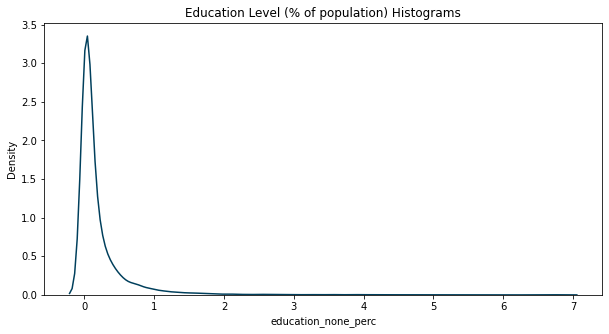

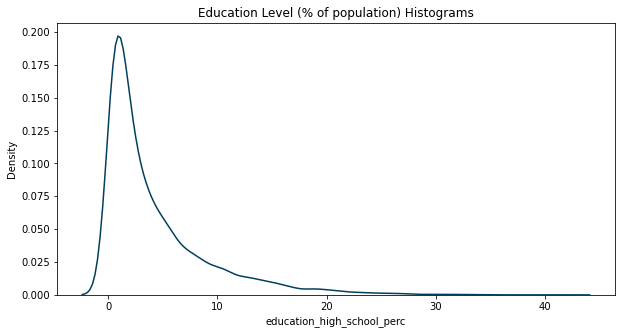

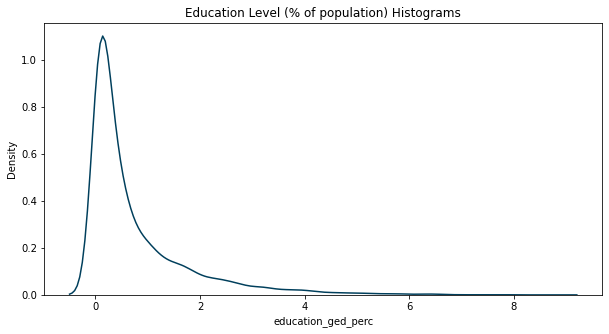

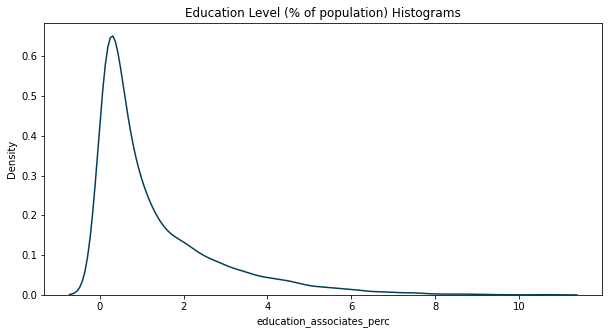

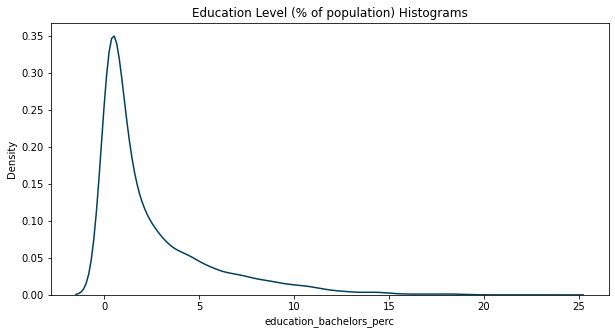

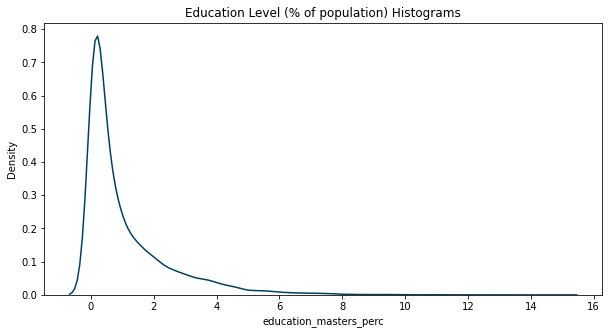

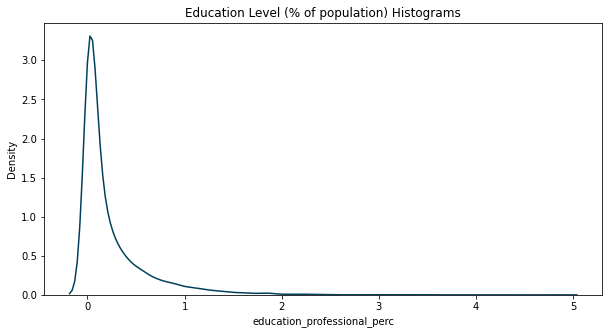

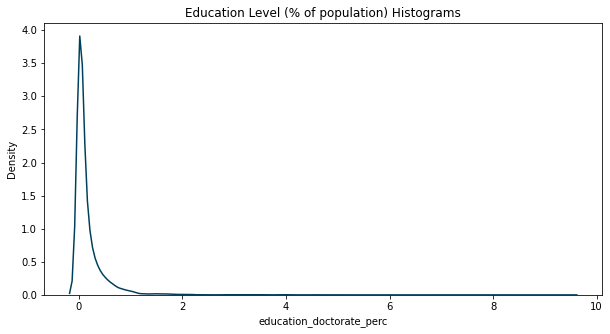

In [26]:
for perc in percentages:
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df, x=perc, color = "#003F5C" )
    plt.title("Education Level (% of population) Histograms")
    plt.show()

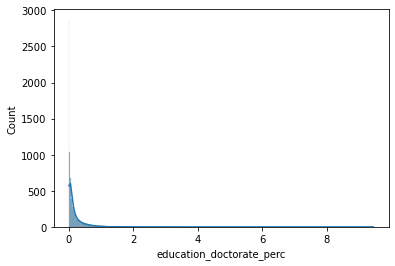

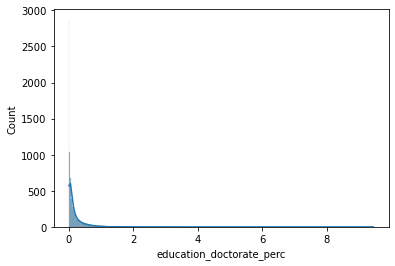

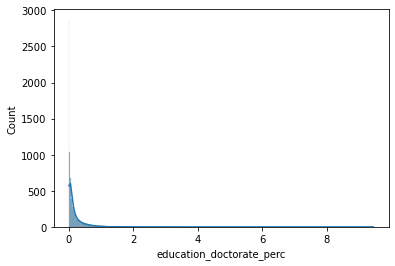

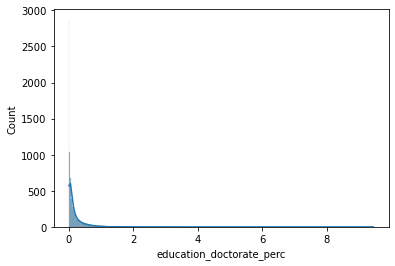

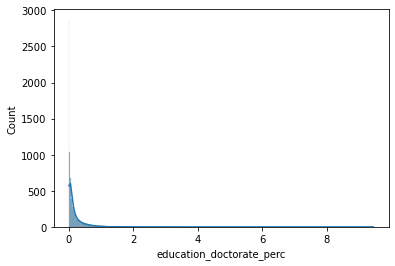

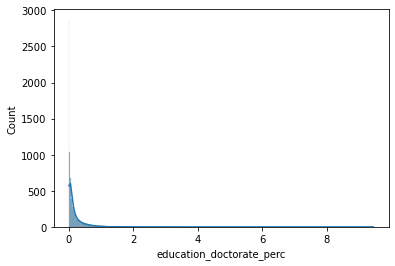

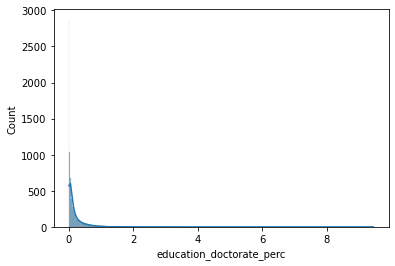

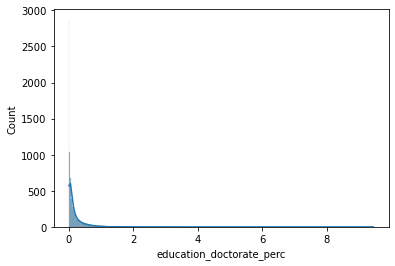

In [28]:
for per in percentages:
    sns.histplot(data=df, x=perc, kde=True)
    plt.show()

# Box and Violin plots

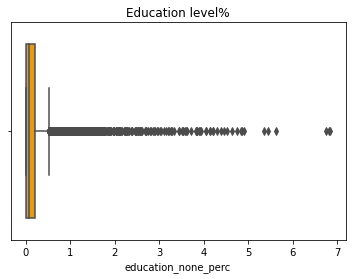

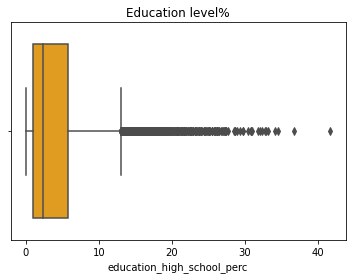

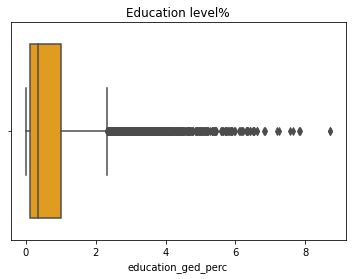

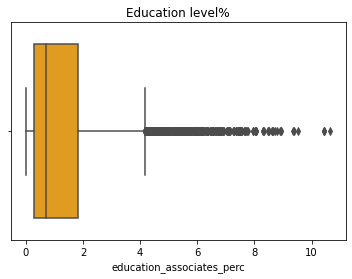

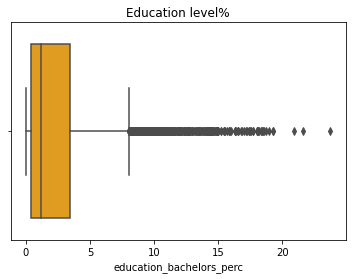

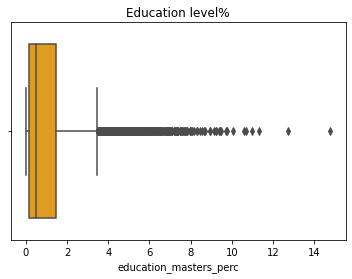

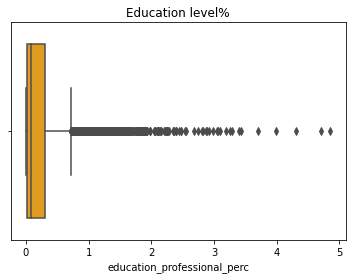

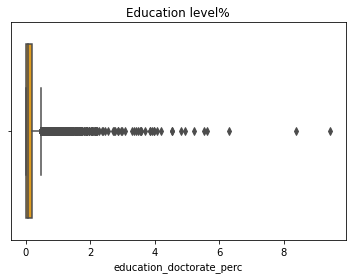

In [16]:
# graph data in box plots-- outliers shown as diamond
#https://seaborn.pydata.org/generated/seaborn.boxplot.html


for perc in percentages:
    ax = sns.boxplot(x=perc, data=df, color="#FFA600")

    plt.title("Education level%")

    # show plot
    plt.show()
    
    

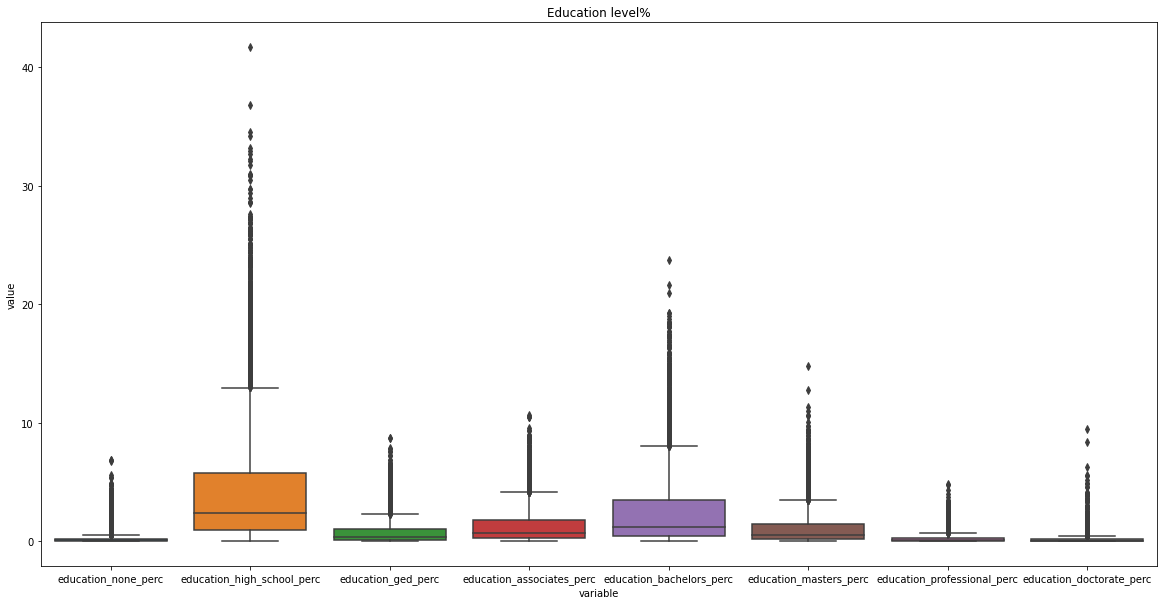

In [17]:
#https://pandas.pydata.org/docs/reference/api/pandas.melt.html

#combined box plot for education

education_df= df[['education_none_perc', 'education_high_school_perc',
       'education_ged_perc', 'education_associates_perc',
       'education_bachelors_perc', 'education_masters_perc',
       'education_professional_perc', 'education_doctorate_perc']]
education= pd.melt(education_df)

plt.figure(figsize=(20,10))
ax = sns.boxplot(x="variable", y="value", data=education)

plt.title("Education level%")

plt.show()


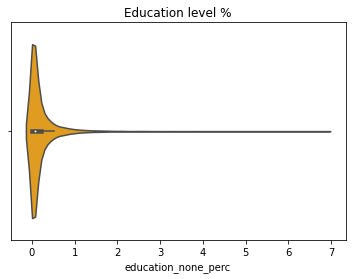

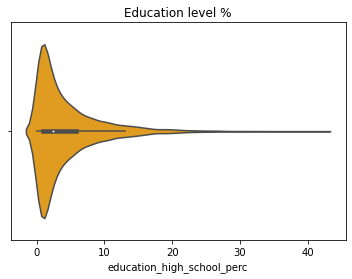

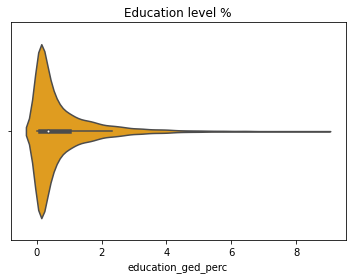

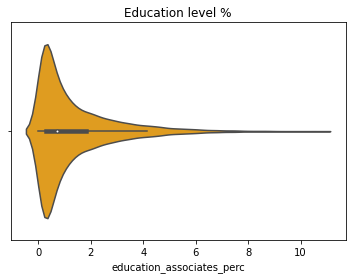

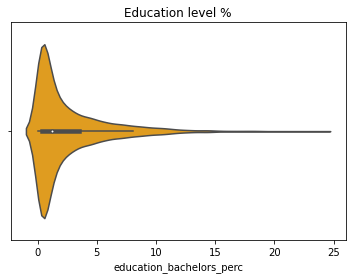

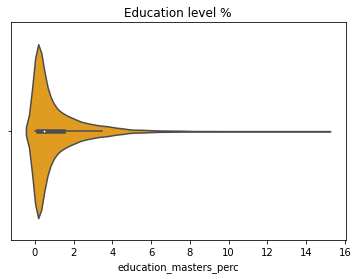

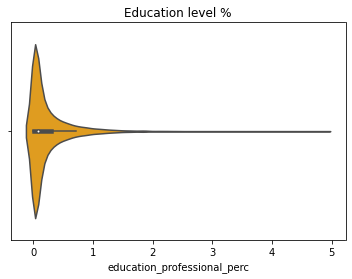

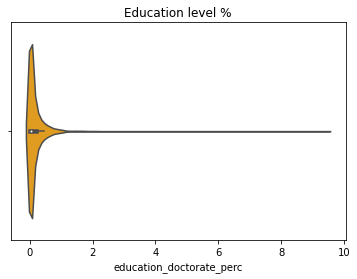

In [18]:
#violin plots

for perc in percentages:
    ax = sns.violinplot(x=perc, data=df, color="#FFA600")

    plt.title("Education level %")

    #set axis at 0
    #plt.ylim(0, 80)

    # show plot
    plt.show()
    


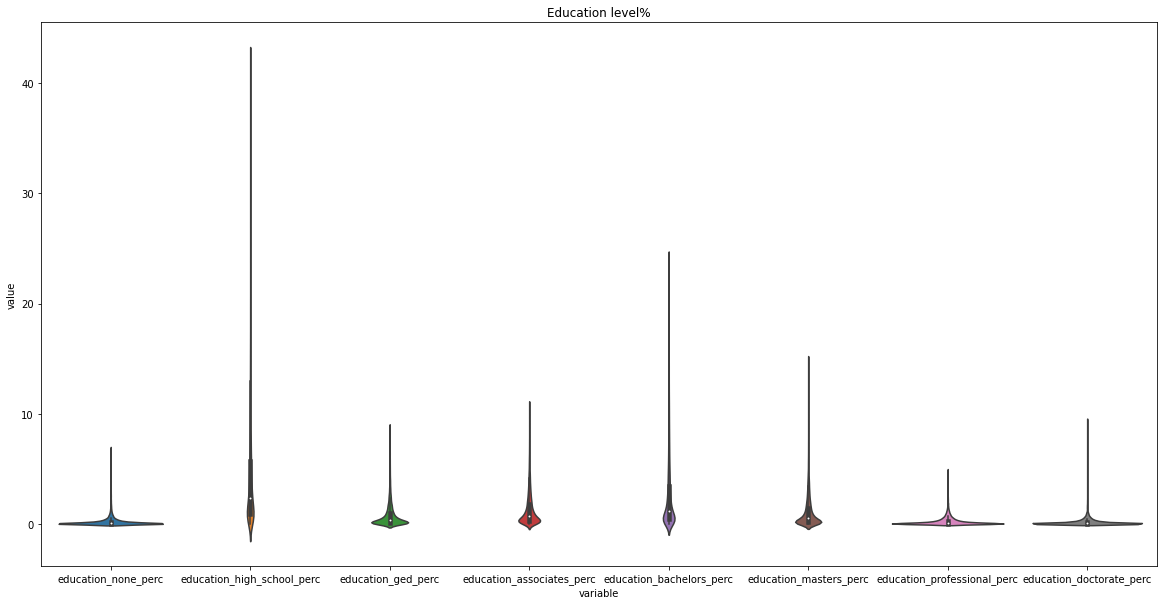

In [19]:
#combined violin plot

plt.figure(figsize=(20,10))
ax = sns.violinplot(x="variable", y="value", data=education)

plt.title("Education level%")

plt.show()

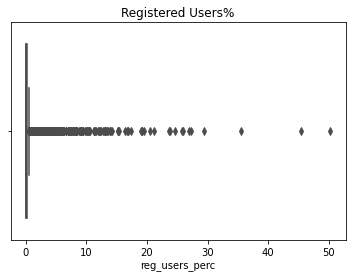

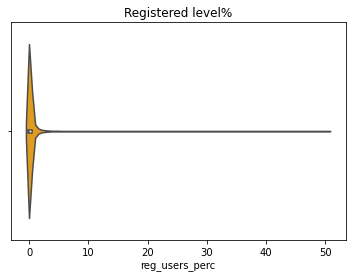

In [20]:
ax = sns.boxplot(x="reg_users_perc", data=df, color="#FFA600")

plt.title("Registered Users%")

plt.show()

ax = sns.violinplot(x="reg_users_perc", data=df, color="#FFA600")

plt.title("Registered level%")

plt.show()

# linear regression

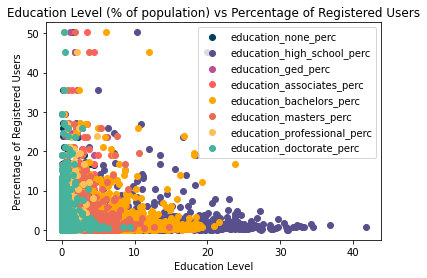

In [21]:
#make scatter plot


plt.scatter(df["education_none_perc"], df["reg_users_perc"], color= "#003F5C")
plt.scatter(df["education_high_school_perc"], df["reg_users_perc"], color= "#58508D")
plt.scatter(df["education_ged_perc"], df["reg_users_perc"], color= "#BC5090")
plt.scatter(df["education_associates_perc"], df["reg_users_perc"], color= "#FF6361")
plt.scatter(df["education_bachelors_perc"], df["reg_users_perc"], color= "#FFA600")
plt.scatter(df["education_masters_perc"], df["reg_users_perc"], color= "#EC6B56")
plt.scatter(df["education_professional_perc"], df["reg_users_perc"], color= "#FFC154")
plt.scatter(df["education_doctorate_perc"], df["reg_users_perc"], color= "#47B39C")

plt.legend(percentages)

#axis titles
plt.title('Education Level (% of population) vs Percentage of Registered Users')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Registered Users')


plt.show()

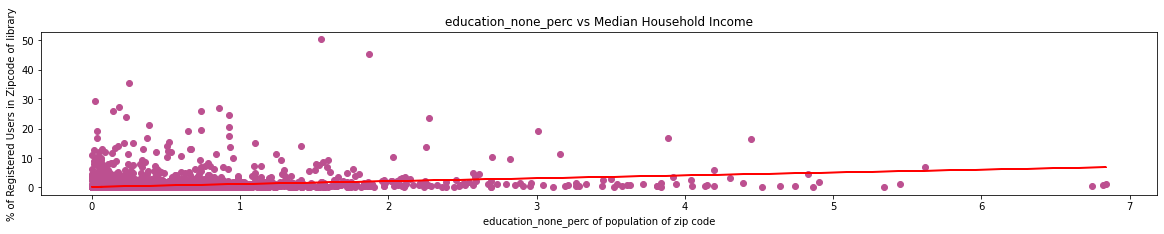

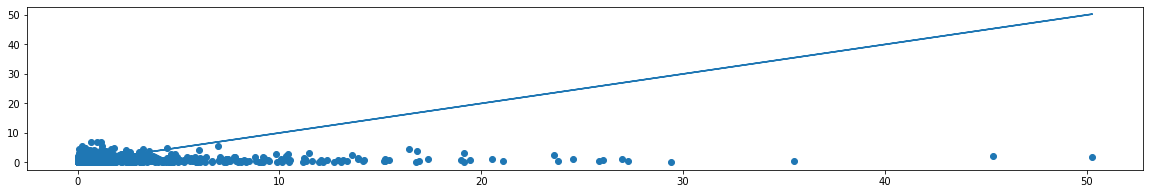

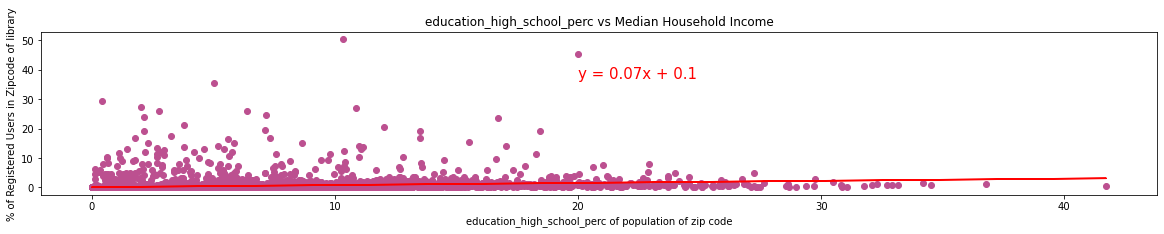

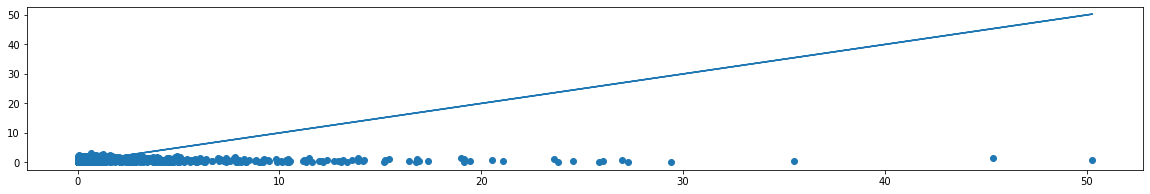

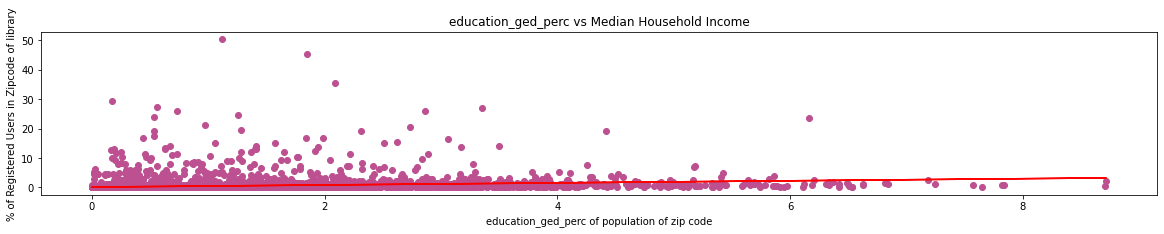

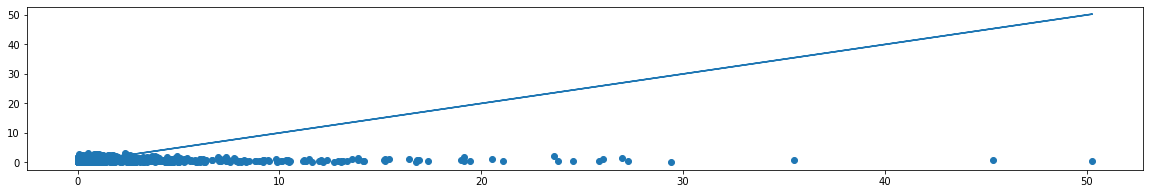

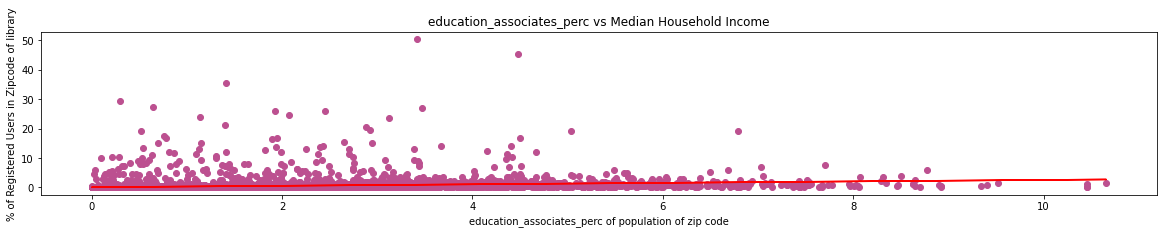

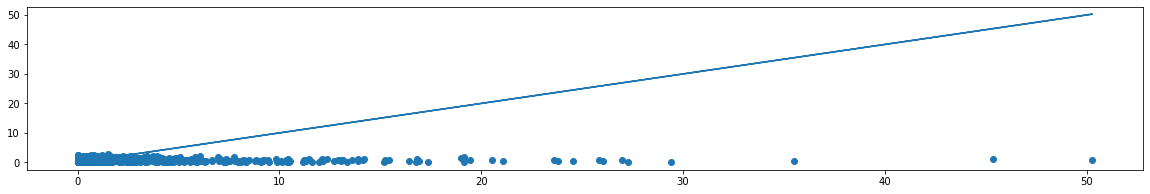

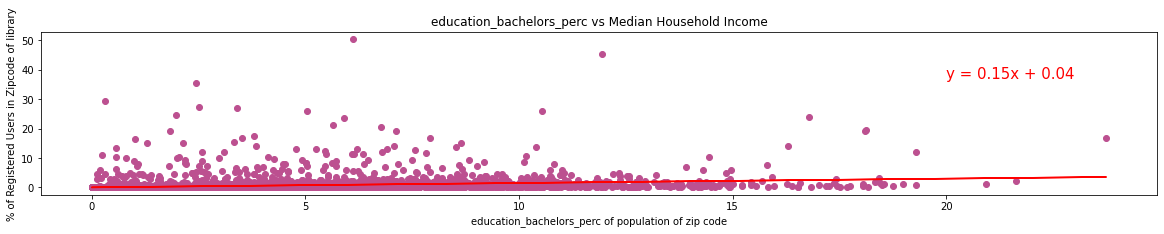

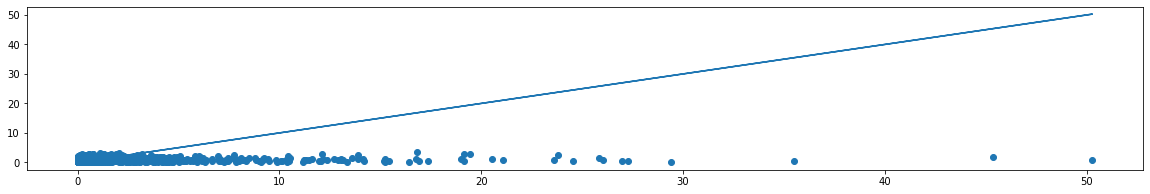

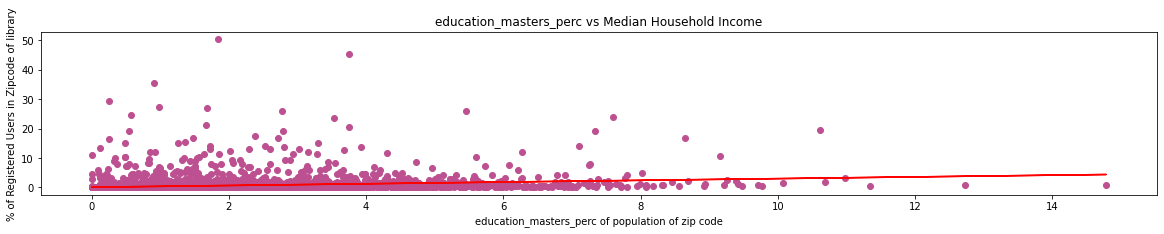

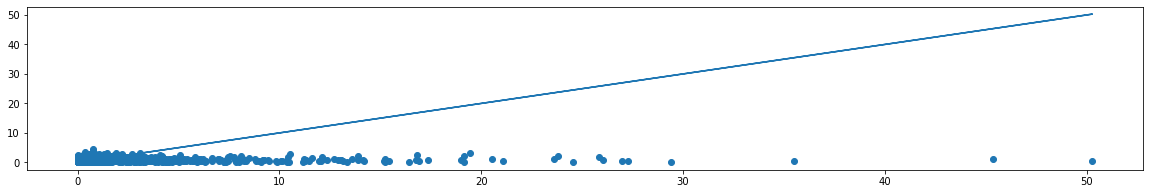

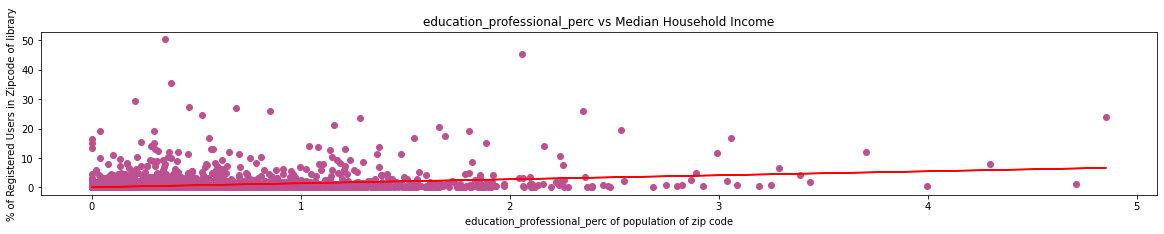

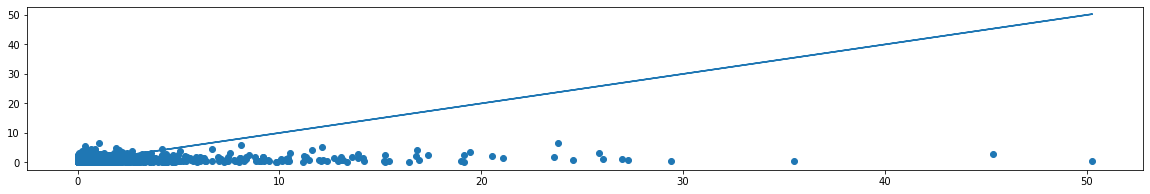

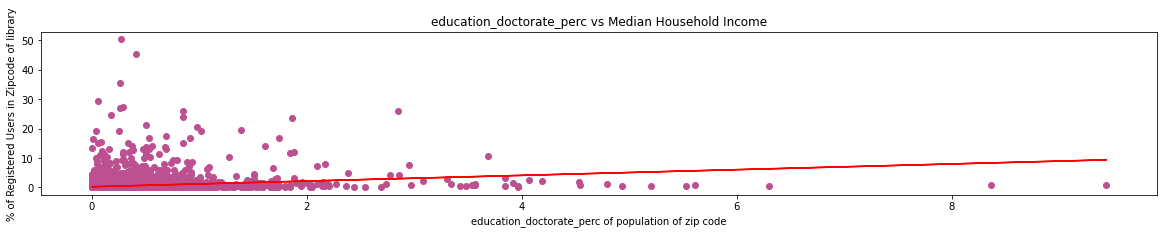

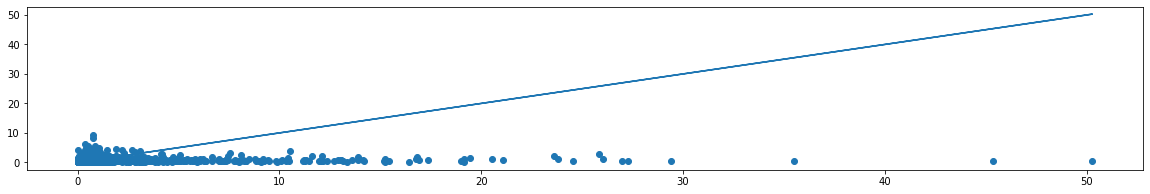

In [42]:
#linear regression


for perc in percentages:
   
    # Add the linear regression equation and line to plot
    plt.figure(figsize=(20,3))
    x_values = df[perc]
    y_values = df["reg_users_perc"]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, color="#BC5090")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(20,37),fontsize=15,color="red")
    plt.xlabel(f"{perc} of population of zip code")
    plt.ylabel('% of Registered Users in Zipcode of library')
    plt.title(f'{perc} vs Median Household Income')
    plt.show()
    
    plt.figure(figsize=(20,3))
    plt.scatter(y_values, regress_values) # plot predicted data
    plt.plot(y_values,y_values) # plot a line of actual data

    plt.show()

In [29]:
 # STATSMODELS
X = df["education_bachelors_perc"]
X = sm.add_constant(X) # adding a constant

y = df["reg_users_perc"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         reg_users_perc   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     731.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          5.37e-155
Time:                        19:12:03   Log-Likelihood:                -17357.
No. Observations:                9170   AIC:                         3.472e+04
Df Residuals:                    9168   BIC:                         3.473e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
X = sm.add_constant(df[percentages])
Y = df.reg_users_perc

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         reg_users_perc   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     182.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.55e-288
Time:                        19:12:11   Log-Likelihood:                -17030.
No. Observations:                9170   AIC:                         3.408e+04
Df Residuals:                    9161   BIC:                         3.414e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0539      0.022      2.409      0.016       0.010       0.098
education_none_perc             0.6548      0.053     12.409      0.000       0.551       0.758
education_high_school_perc     -0.0453      0.009     -4.794      0.000      -0.064      -0.027
education_ged_perc              0.2545      0.033      7.713      0.000       0.190       0.319
education_associates_perc      -0.0457      0.030     -1.542      0.123      -0.104       0.012
education_bachelors_perc        0.1133      0.019      5.848      0.000       0.075       0.151
education_masters_perc         -0.3827      0.044     -8.788      0.000      -0.468      -0.297
education_professional_perc     1.5324      0.087     17.567      0.000       1.361       1.703
education_doctorate_perc        0.2158      0.077      2.796      0.005       0.064       0.367
==============================================================================
Omnibus:                    16546.396   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27698011.950
Skew:                          13.095   Prob(JB):                         0.00
Kurtosis:                     270.967   Cond. No.                         43.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ANOVA test

In [49]:
percentages

['education_none_perc',
 'education_high_school_perc',
 'education_ged_perc',
 'education_associates_perc',
 'education_bachelors_perc',
 'education_masters_perc',
 'education_professional_perc',
 'education_doctorate_perc']

In [51]:
group1= df["education_none_perc"]
group2= df["education_high_school_perc"]
group3= df["education_ged_perc"]
group4= df["education_associates_perc"]
group5= df["education_bachelors_perc"]
group6= df["education_masters_perc"]
group7= df["education_professional_perc"]
group8= df["education_doctorate_perc"]

In [53]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

F_onewayResult(statistic=3802.414996386981, pvalue=0.0)

In [54]:
print(stats.ttest_ind(group1, group2, equal_var=False))
print(stats.ttest_ind(group1, group3, equal_var=False))
print(stats.ttest_ind(group1, group4, equal_var=False))
print(stats.ttest_ind(group1, group5, equal_var=False))
print(stats.ttest_ind(group1, group6, equal_var=False))
print(stats.ttest_ind(group1, group7, equal_var=False))
print(stats.ttest_ind(group1, group8, equal_var=False))

print(stats.ttest_ind(group2, group3, equal_var=False))
print(stats.ttest_ind(group2, group4, equal_var=False))
print(stats.ttest_ind(group2, group5, equal_var=False))
print(stats.ttest_ind(group2, group6, equal_var=False))
print(stats.ttest_ind(group2, group7, equal_var=False))
print(stats.ttest_ind(group2, group8, equal_var=False))

print(stats.ttest_ind(group3, group4, equal_var=False))
print(stats.ttest_ind(group3, group5, equal_var=False))
print(stats.ttest_ind(group3, group6, equal_var=False))
print(stats.ttest_ind(group3, group7, equal_var=False))
print(stats.ttest_ind(group3, group8, equal_var=False))

print(stats.ttest_ind(group4, group5, equal_var=False))
print(stats.ttest_ind(group4, group6, equal_var=False))
print(stats.ttest_ind(group4, group7, equal_var=False))
print(stats.ttest_ind(group4, group8, equal_var=False))

print(stats.ttest_ind(group5, group6, equal_var=False))
print(stats.ttest_ind(group5, group7, equal_var=False))
print(stats.ttest_ind(group5, group8, equal_var=False))

print(stats.ttest_ind(group6, group7, equal_var=False))
print(stats.ttest_ind(group6, group8, equal_var=False))

print(stats.ttest_ind(group7, group8, equal_var=False))

Ttest_indResult(statistic=-79.15489963543146, pvalue=0.0)
Ttest_indResult(statistic=-47.14734657607826, pvalue=0.0)
Ttest_indResult(statistic=-67.81107921102797, pvalue=0.0)
Ttest_indResult(statistic=-70.81363235873611, pvalue=0.0)
Ttest_indResult(statistic=-56.470418640142206, pvalue=0.0)
Ttest_indResult(statistic=-5.1406844464330135, pvalue=2.7661369122120835e-07)
Ttest_indResult(statistic=6.09903774219311, pvalue=1.0891532948407218e-09)
Ttest_indResult(statistic=67.22648373157696, pvalue=0.0)
Ttest_indResult(statistic=55.46622001535291, pvalue=0.0)
Ttest_indResult(statistic=29.219564255290287, pvalue=9.926448789996746e-183)
Ttest_indResult(statistic=59.97485781904973, pvalue=0.0)
Ttest_indResult(statistic=78.62451965872268, pvalue=0.0)
Ttest_indResult(statistic=79.97195972324073, pvalue=0.0)
Ttest_indResult(statistic=-29.02225231728896, pvalue=1.3103308517580064e-180)
Ttest_indResult(statistic=-51.58149333733241, pvalue=0.0)
Ttest_indResult(statistic=-17.60068570963374, pvalue=1.009